In [3]:
import yfinance as yf
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time


In [6]:
# Load the model from .pkl file
model = joblib.load('../../technical_analysis_model/model_pkl_files/decision_tree_model.pkl')

In [7]:
# Function to fetch latest data and make predictions
def fetch_data_and_predict():
    # Fetch latest data
    symbol = "^NSEI"
    ticker = yf.Ticker(symbol)
    data = ticker.history(interval="1m", period="1d")
    data.drop(columns=['Volume', 'Dividends', 'Stock Splits'], inplace=True)

    # Prepare data for prediction
    X = data[['Open', 'High', 'Low', 'Close']]

    # Predict using the model
    live_prediction = model.predict(X)

    # C lear previous graph
    clear_output(wait=True)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Close'], label='Actual Close', color='blue')
    plt.plot(data.index, live_prediction, label='Predicted Close', color='red', linestyle='dashed')
    plt.title('Actual vs Predicted Closing Price')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

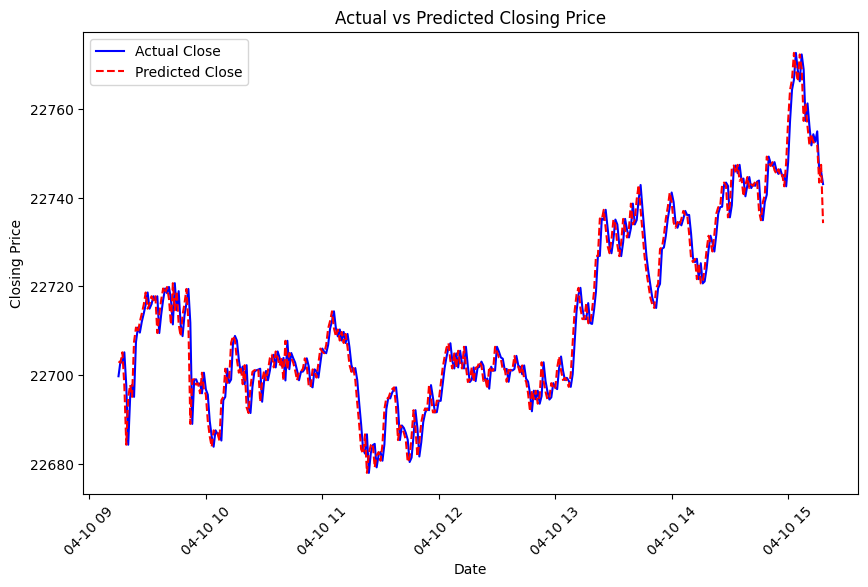

KeyboardInterrupt: 

In [8]:

# Continuously fetch data and make predictions every 1 minute
while True:
    # Fetch data and plot
    fetch_data_and_predict()

    # Countdown timer
    for i in range(60, 0, -1):
        print(f"Time remaining: {i} seconds", end='\r')
        time.sleep(1)

    # Clear the last remaining time message
    clear_output(wait=True)